In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

## Load the data

In [138]:
#f = lambda x: pd.datetime.strptime(x, '%y-%b-%d HH:MM:SS')
ad_data = pd.read_csv('data/ad_data.csv')#, index_col=False, parse_dates = ['start_time', 'end_time'], date_parser=d)
voters = pd.read_csv("data/registered_voters.csv", thousands=',')
past_elections = pd.read_csv("data/past_elections.csv", thousands=',')
unique_ad = pd.read_csv("data/unique_ad.csv")

In [9]:
ad_data.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created
0,1,5643,KLAS,"Las Vegas, NV",8 News Now at 5 PM,news,2016-09-09 00:12:59 UTC,2016-09-09 00:13:29 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
1,2,5643,WNCN,"Raleigh-Durham-Fayetteville, NC",North Carolina News at 500PM,news,2016-09-06 21:58:25 UTC,2016-09-06 21:58:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
2,3,5643,KLAS,"Las Vegas, NV",Face the Nation,news,2016-09-04 16:24:25 UTC,2016-09-04 16:24:55 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
3,4,5643,WFLA,"Tampa-St. Petersburg, FL",Days of Our Lives,not news,2016-08-30 17:59:20 UTC,2016-08-30 17:59:50 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49
4,5,5643,KSNV,"Las Vegas, NV",The Tonight Show Starring Jimmy Fallon,news,2016-09-06 07:02:22 UTC,2016-09-06 07:02:52 UTC,PolAd_HillaryClinton_f1h3j,https://archive.org/embed/PolAd_HillaryClinton...,Hillary for America,Multiple,PRES,2016.0,"Energy, China, Jobs",Hillary Clinton,campaign,pro,9/12/2016 14:49


In [11]:
ad_data.shape

(375350, 19)

In [12]:
ad_data['location'].value_counts()

Boston, MA/Manchester, NH                            50920
Philadelphia, PA                                     44326
Las Vegas, NV                                        42131
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         24580
Tampa-St. Petersburg, FL                             24207
Cleveland, Ohio                                      23156
San Francisco-Oakland-San Jose, CA                   20944
Des Moines-Ames, Iowa                                17726
Raleigh-Durham-Fayetteville,  NC                     17437
Milwaukee, WI                                        15423
Sioux City, Iowa                                     12906
Phoenix-Prescott, AZ                                 12900
Washington, DC/Hagerstown, MD                        12325
Denver, CO                                           10901
Columbia, SC                                         10870
Greenville-Spartanburg, SC/Asheville-Anderson, NC     8565
Reno, NV                                              60

In [13]:
ad_data.race.unique()

array(['PRES', 'NHS1', 'PAS1', 'AZS1', 'AZ05', 'WIS2', nan, 'INS2',
       'WI01', 'ILS2', 'CAS1', 'MD08', 'PA08', 'MDS2', 'MD04', 'PA02',
       'KS01', 'IAS1', 'NCS2', 'NVS2', 'OHS2', 'COS1', 'FLS2', 'CO06',
       'OH08', 'OH14', 'NC02', 'NC11', 'NJ03', 'KYS2'], dtype=object)

In [14]:
ad_data[ad_data.race == "PRES"].shape

(223722, 19)

In [15]:
ad_data[ad_data.race == "PRES"].shape[0] / ad_data.shape[0]

0.5960357000133208

c:\users\mutho\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


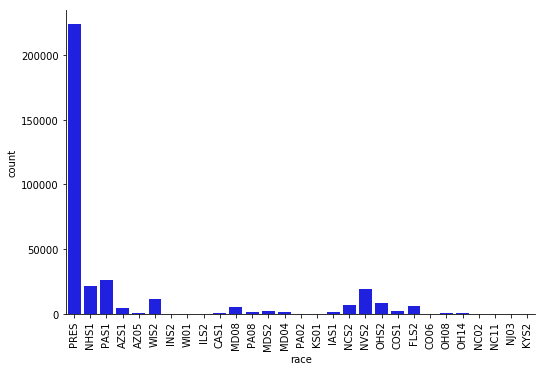

In [16]:
g = sns.factorplot("race", data=ad_data, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

In [32]:
ad_data.message.value_counts()

con        128108
pro        115091
unknown     78724
mixed       53024
mix           403
Name: message, dtype: int64

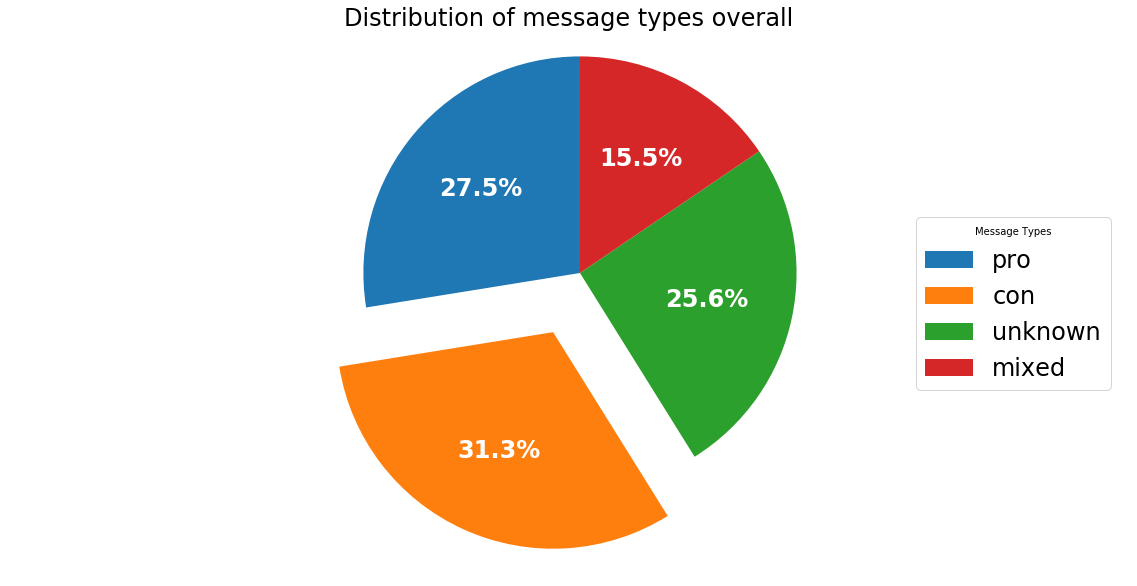

In [47]:
labels = 'pro', 'con', "unknown", "mixed"
sizes = ad_data.message.value_counts().tolist()
sizes[0], sizes[1] = sizes[1], sizes[0]
explode = (0, 0.3, 0, 0)

fig1, ax = plt.subplots(figsize=(20, 10))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w"))
ax.axis('equal') 
ax.legend(wedges, labels,
          title="Message Types",
          loc="center left",
          prop={'size': 24},
          bbox_to_anchor=(0.8, 0, 0, 1))

plt.setp(autotexts, size=24, weight="bold")
ax.set_title("Distribution of message types overall", size=24)
plt.show()


## Working With Presidential Data Only

In [41]:
ad_data = ad_data[ad_data.race=='PRES']

In [42]:
ad_data.shape

(223722, 19)

## The Cities We Will Investigate

In [78]:
d['location'].value_counts()

Boston, MA/Manchester, NH                            27566
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         22384
Las Vegas, NV                                        17851
Des Moines-Ames, Iowa                                17163
Tampa-St. Petersburg, FL                             16688
San Francisco-Oakland-San Jose, CA                   16282
Philadelphia, PA                                     15168
Cleveland, Ohio                                      14039
Sioux City, Iowa                                     12906
Columbia, SC                                         10352
Greenville-Spartanburg, SC/Asheville-Anderson, NC     8558
Raleigh-Durham-Fayetteville,  NC                      8128
Denver, CO                                            6641
Reno, NV                                              6031
Milwaukee, WI                                         4101
Orlando-Daytona Beach-Melbourne, FL                   4027
Phoenix-Prescott, AZ                                  32

In [79]:
LOCATIONS = [
 'Boston, MA/Manchester, NH',
 'Philadelphia, PA',
 'Las Vegas, NV',
 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa',
 'Tampa-St. Petersburg, FL',
 'Cleveland, Ohio',
 'San Francisco-Oakland-San Jose, CA',
 'Des Moines-Ames, Iowa', 
 #'Raleigh-Durham-Fayetteville,  NC',
 #'Milwaukee, WI'
 'Sioux City, Iowa',
 'Columbia, SC'
]

## Distribution of Message Types

In [43]:
## Recode mix to mixed
ad_data['message'].replace("mix", "mixed", inplace=True)

In [39]:
ad_data.message.unique()

array(['pro', 'con', 'mixed', 'unknown'], dtype=object)

In [44]:
ad_data.message.value_counts()

pro        70092
con        61628
unknown    57317
mixed      34685
Name: message, dtype: int64

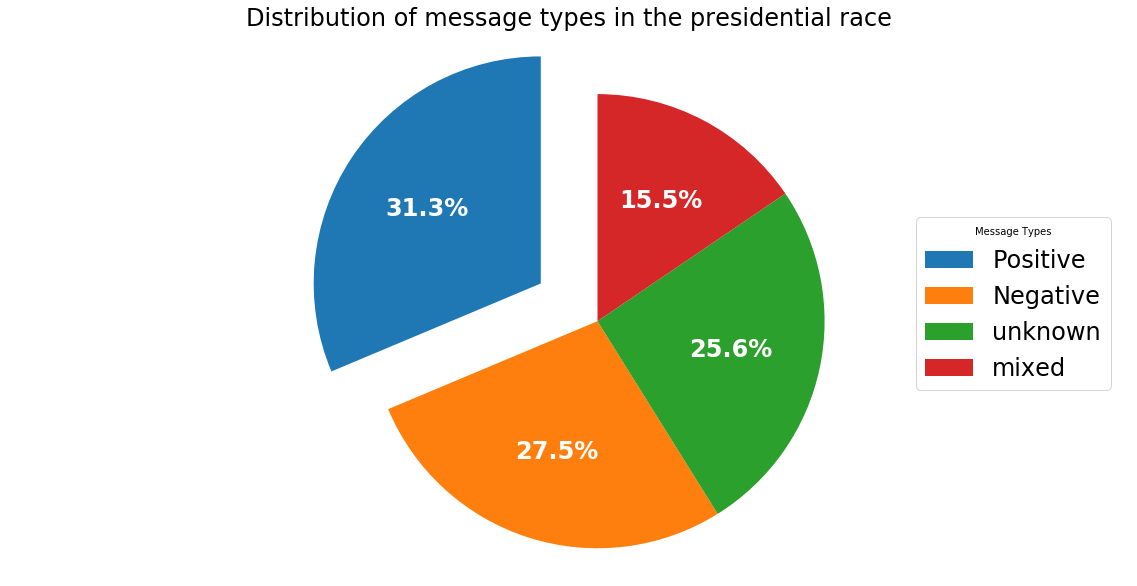

In [48]:
labels = 'Positive', 'Negative', "unknown", "mixed"
sizes = ad_data.message.value_counts().tolist()
explode = (0.3, 0, 0, 0)

fig1, ax = plt.subplots(figsize=(20, 10))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops=dict(color="w"))
ax.axis('equal') 
ax.legend(wedges, labels,
          title="Message Types",
          loc="center left",
          prop={'size': 24},
          bbox_to_anchor=(0.8, 0, 0, 1))

plt.setp(autotexts, size=24, weight="bold")
ax.set_title("Distribution of message types in the presidential race", size=24)
plt.show()


## Voter registration

In [20]:
voters.head()

,state,group,county,city,registered,democrat,republican,other,source,voted_for_hillary,voted_for_trump,total_votes,party_won
0,CA,"San Francisco-Oakland-San Jose, CA",San Francisco,San Francisco,"512,723","296,772","38,279","177,672",https://elections.cdn.sos.ca.gov/sov/2016-gene...,"345,084","37,688","405,792",D
1,CA,"San Francisco-Oakland-San Jose, CA",Almaeda,Oakland,"888,664","510,429","107,482","270,753",https://elections.cdn.sos.ca.gov/sov/2016-gene...,"514,842","95,922","654,266",D
2,CA,"San Francisco-Oakland-San Jose, CA",Santa Clara,San Jose,"875,176","411,479","171,281","292,416",https://elections.cdn.sos.ca.gov/sov/2016-gene...,"511,684","144,826","703,709",D
3,MA,"Boston, MA/Manchester, NH",Suffolk county,Boston,"471,829","235,436","28,033","208,360",https://www.sec.state.ma.us/ele/eleregistratio...,"245,751",50421,317207,D
4,NV,"Las Vegas, NV",Clark county,Las Vegas,"1,185,893","512,041","338,372","335,480",https://www.nvsos.gov/sos/elections/voters/vot...,"402,227","320,057",767156,D


## Cities with the most negative ads

In [69]:
c = ad_data[ad_data.message == "con"]
c.shape

(61628, 19)

In [70]:
c['location'].value_counts()

Tampa-St. Petersburg, FL                             8685
Philadelphia, PA                                     7130
San Francisco-Oakland-San Jose, CA                   6574
Cleveland, Ohio                                      6225
Las Vegas, NV                                        5954
Boston, MA/Manchester, NH                            3943
Raleigh-Durham-Fayetteville,  NC                     3594
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         3438
Milwaukee, WI                                        2749
Denver, CO                                           2447
Columbia, SC                                         2275
Phoenix-Prescott, AZ                                 2134
Orlando-Daytona Beach-Melbourne, FL                  1802
Greenville-Spartanburg, SC/Asheville-Anderson, NC    1718
Des Moines-Ames, Iowa                                 839
Washington, DC/Hagerstown, MD                         730
Sioux City, Iowa                                      624
Miami-Fort Lau

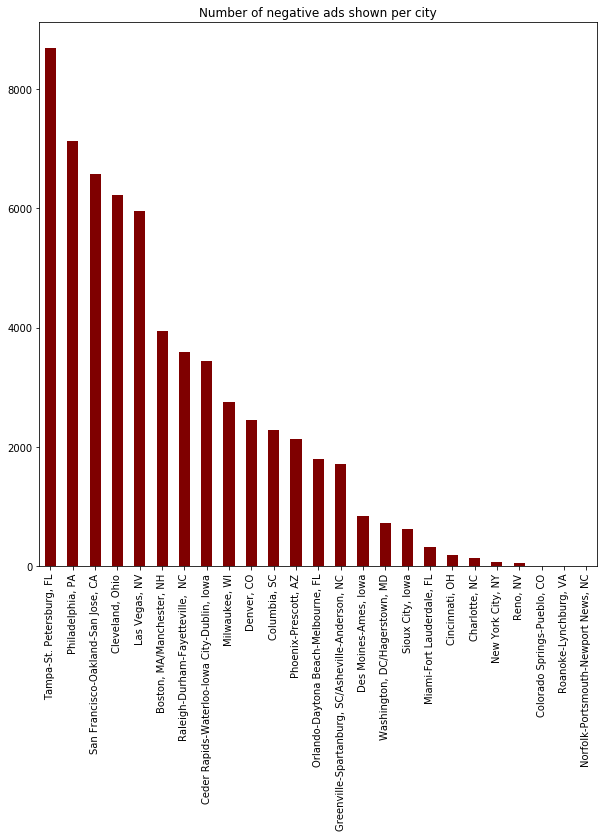

In [71]:
c.location.value_counts().plot(kind='bar', figsize=(10,10), title="Number of negative ads shown per city", colormap="OrRd_r")

## Cities with the most positive ads

In [72]:
p = ad_data[ad_data.message == "pro"]
p.shape

(70092, 19)

In [75]:
p['location'].value_counts()

Boston, MA/Manchester, NH                            8737
Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa         7576
Des Moines-Ames, Iowa                                6469
Las Vegas, NV                                        6224
Sioux City, Iowa                                     4620
Columbia, SC                                         4391
Cleveland, Ohio                                      3823
Philadelphia, PA                                     3670
Greenville-Spartanburg, SC/Asheville-Anderson, NC    3423
San Francisco-Oakland-San Jose, CA                   3185
Tampa-St. Petersburg, FL                             3155
Reno, NV                                             3121
Raleigh-Durham-Fayetteville,  NC                     2214
Denver, CO                                           1723
Cincinnati, OH                                       1421
New York City, NY                                    1288
Orlando-Daytona Beach-Melbourne, FL                  1020
Norfolk-Portsm

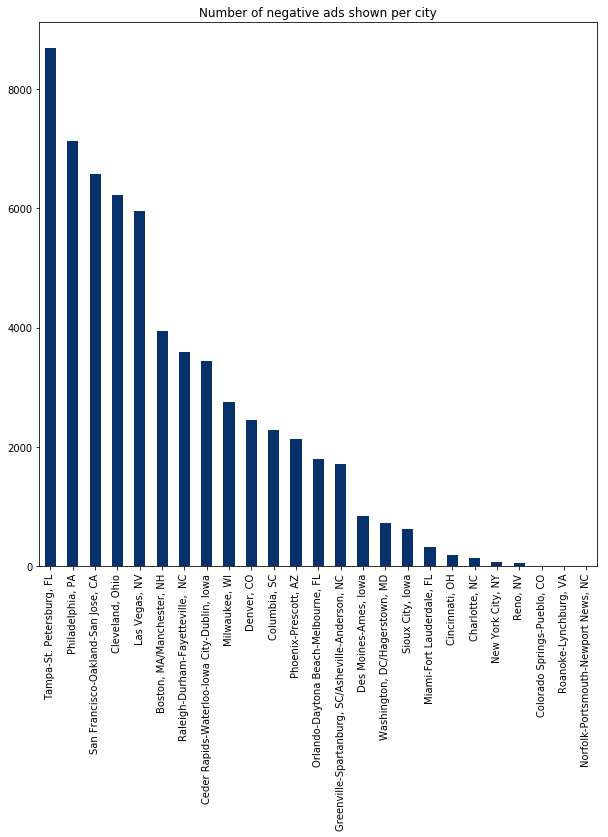

In [74]:
c.location.value_counts().plot(kind='bar', figsize=(10,10), title="Number of negative ads shown per city", colormap="Blues_r")

In [76]:
### Bringing them together

In [115]:
def c(location):
    return ad_data[(ad_data.location == location) & (ad_data.message=="con")]['location'].count()
def p(location):
    return ad_data[(ad_data.location == location) & (ad_data.message=="pro")]['location'].count()

locations = ad_data.location.value_counts().keys().tolist()[0:10]

pos = [p(location) for location in locations]
neg = [c(location) for location in locations]
print(locations, pos, neg)

['Boston, MA/Manchester, NH', 'Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa', 'Las Vegas, NV', 'Des Moines-Ames, Iowa', 'Tampa-St. Petersburg, FL', 'San Francisco-Oakland-San Jose, CA', 'Philadelphia, PA', 'Cleveland, Ohio', 'Sioux City, Iowa', 'Columbia, SC'] [8737, 7576, 6224, 6469, 3155, 3185, 3670, 3823, 4620, 4391] [3943, 3438, 5954, 839, 8685, 6574, 7130, 6225, 624, 2275]


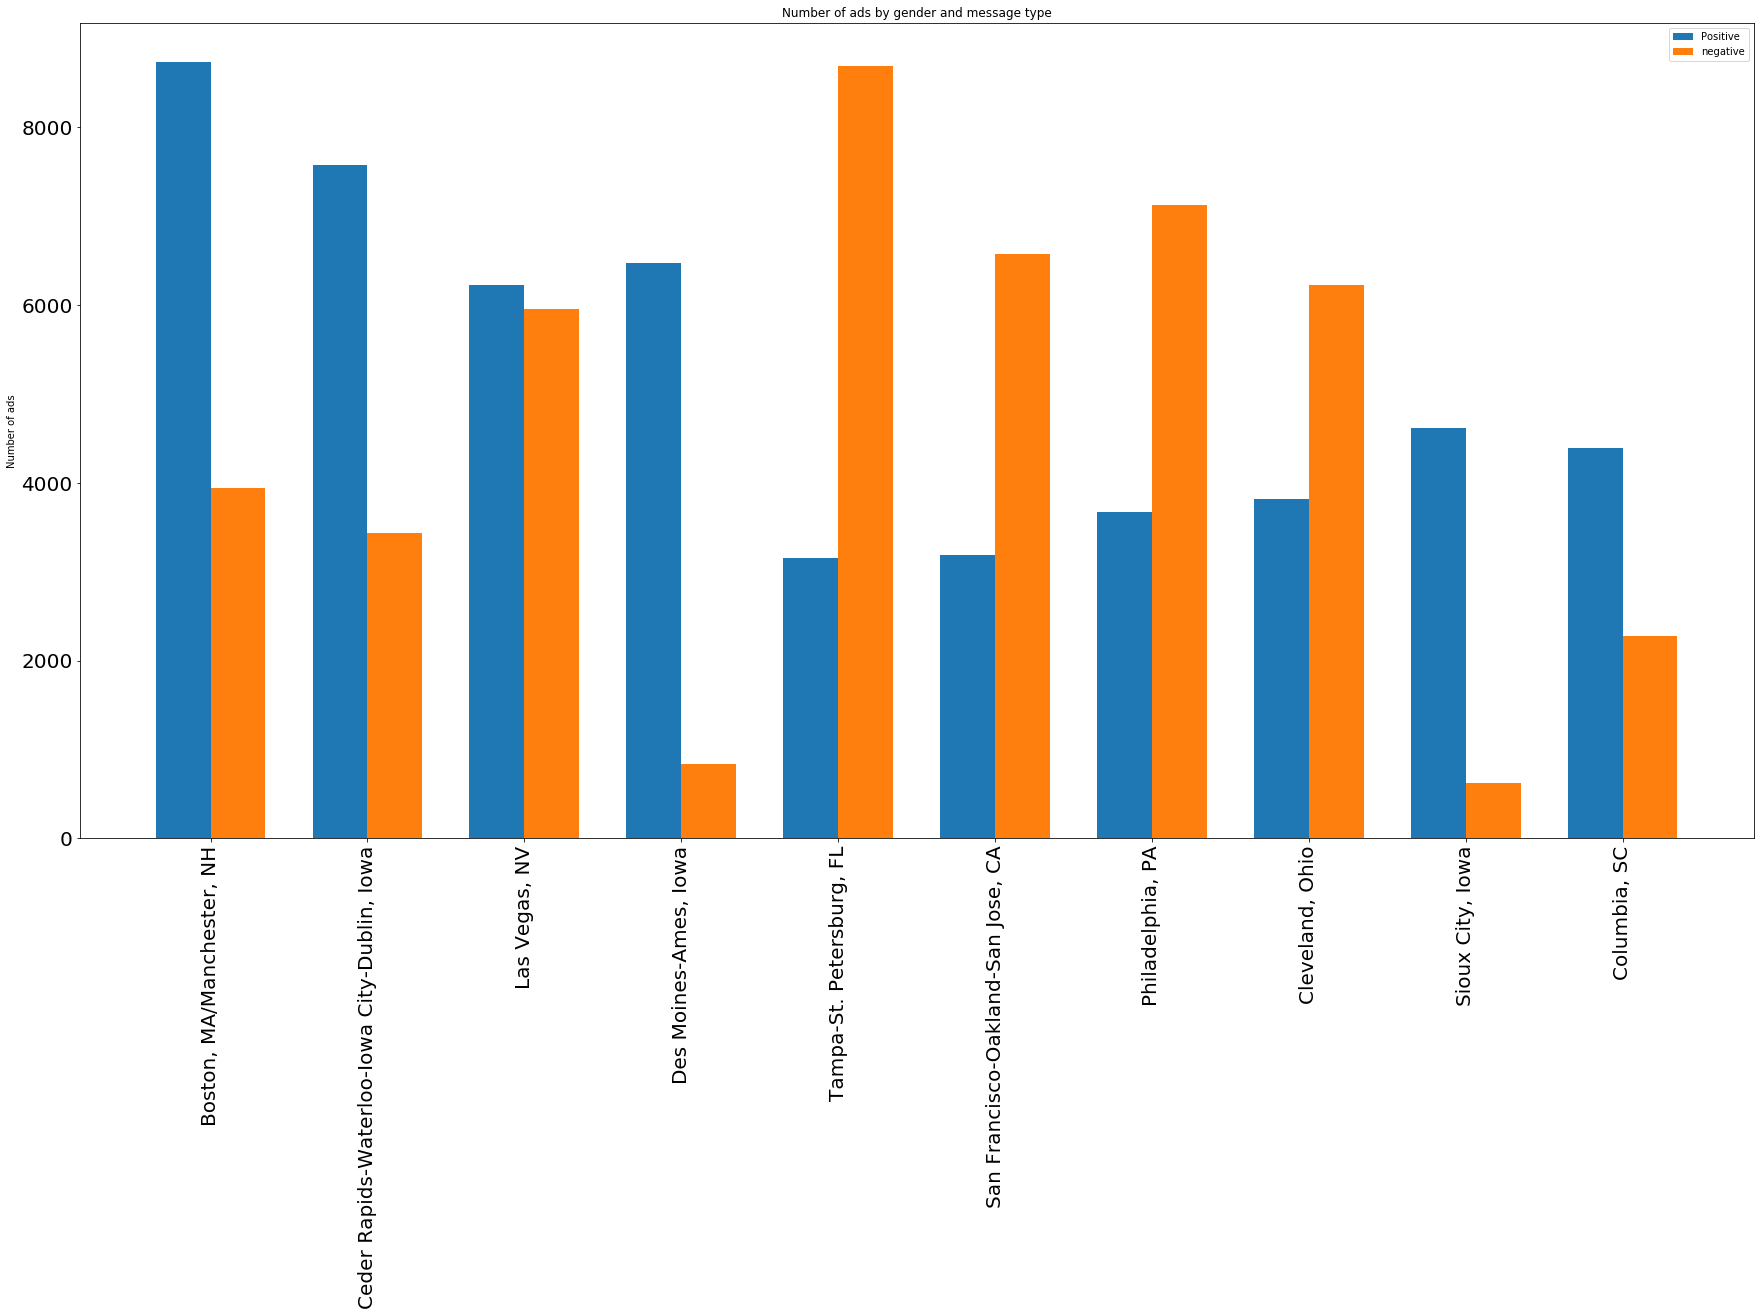

In [122]:
N = len(locations[:10])

ind = np.arange(N) 
width = 0.35 
plt.figure(figsize=(30,15))
plt.bar(ind, pos, width, label='Positive')
plt.bar(ind + width, neg, width, label='negative')

plt.ylabel('Number of ads')
plt.title('Number of ads by gender and message type')

plt.xticks(ind + width / 2, locations, rotation=90)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc='best')
plt.show()

## Voter turnout

In [144]:
voters.head()

,state,group,county,city,registered,democrat,republican,other,source,voted_for_hillary,voted_for_trump,total_votes,party_won
0,CA,"San Francisco-Oakland-San Jose, CA",San Francisco,San Francisco,512723,296772.0,38279.0,177672,https://elections.cdn.sos.ca.gov/sov/2016-gene...,345084,37688,405792,D
1,CA,"San Francisco-Oakland-San Jose, CA",Almaeda,Oakland,888664,510429.0,107482.0,270753,https://elections.cdn.sos.ca.gov/sov/2016-gene...,514842,95922,654266,D
2,CA,"San Francisco-Oakland-San Jose, CA",Santa Clara,San Jose,875176,411479.0,171281.0,292416,https://elections.cdn.sos.ca.gov/sov/2016-gene...,511684,144826,703709,D
3,MA,"Boston, MA/Manchester, NH",Suffolk county,Boston,471829,235436.0,28033.0,208360,https://www.sec.state.ma.us/ele/eleregistratio...,245751,50421,317207,D
4,NV,"Las Vegas, NV",Clark county,Las Vegas,1185893,512041.0,338372.0,335480,https://www.nvsos.gov/sos/elections/voters/vot...,402227,320057,767156,D


In [145]:
def turnout(location):
    r = voters.loc[voters.group == location]['registered'].sum()
    tv = voters.loc[voters.group == location]['total_votes'].sum()
    return tv/r * 100

turnout = [turnout(location) for location in locations]

In [146]:
turnout

[70.33736965445023,
 72.78888219351317,
 64.69015332749245,
 71.5149651496515,
 72.29282339552367,
 77.4749919066593,
 64.18072485851111,
 65.54856163523142,
 69.40356558873489,
 66.18807200888146]

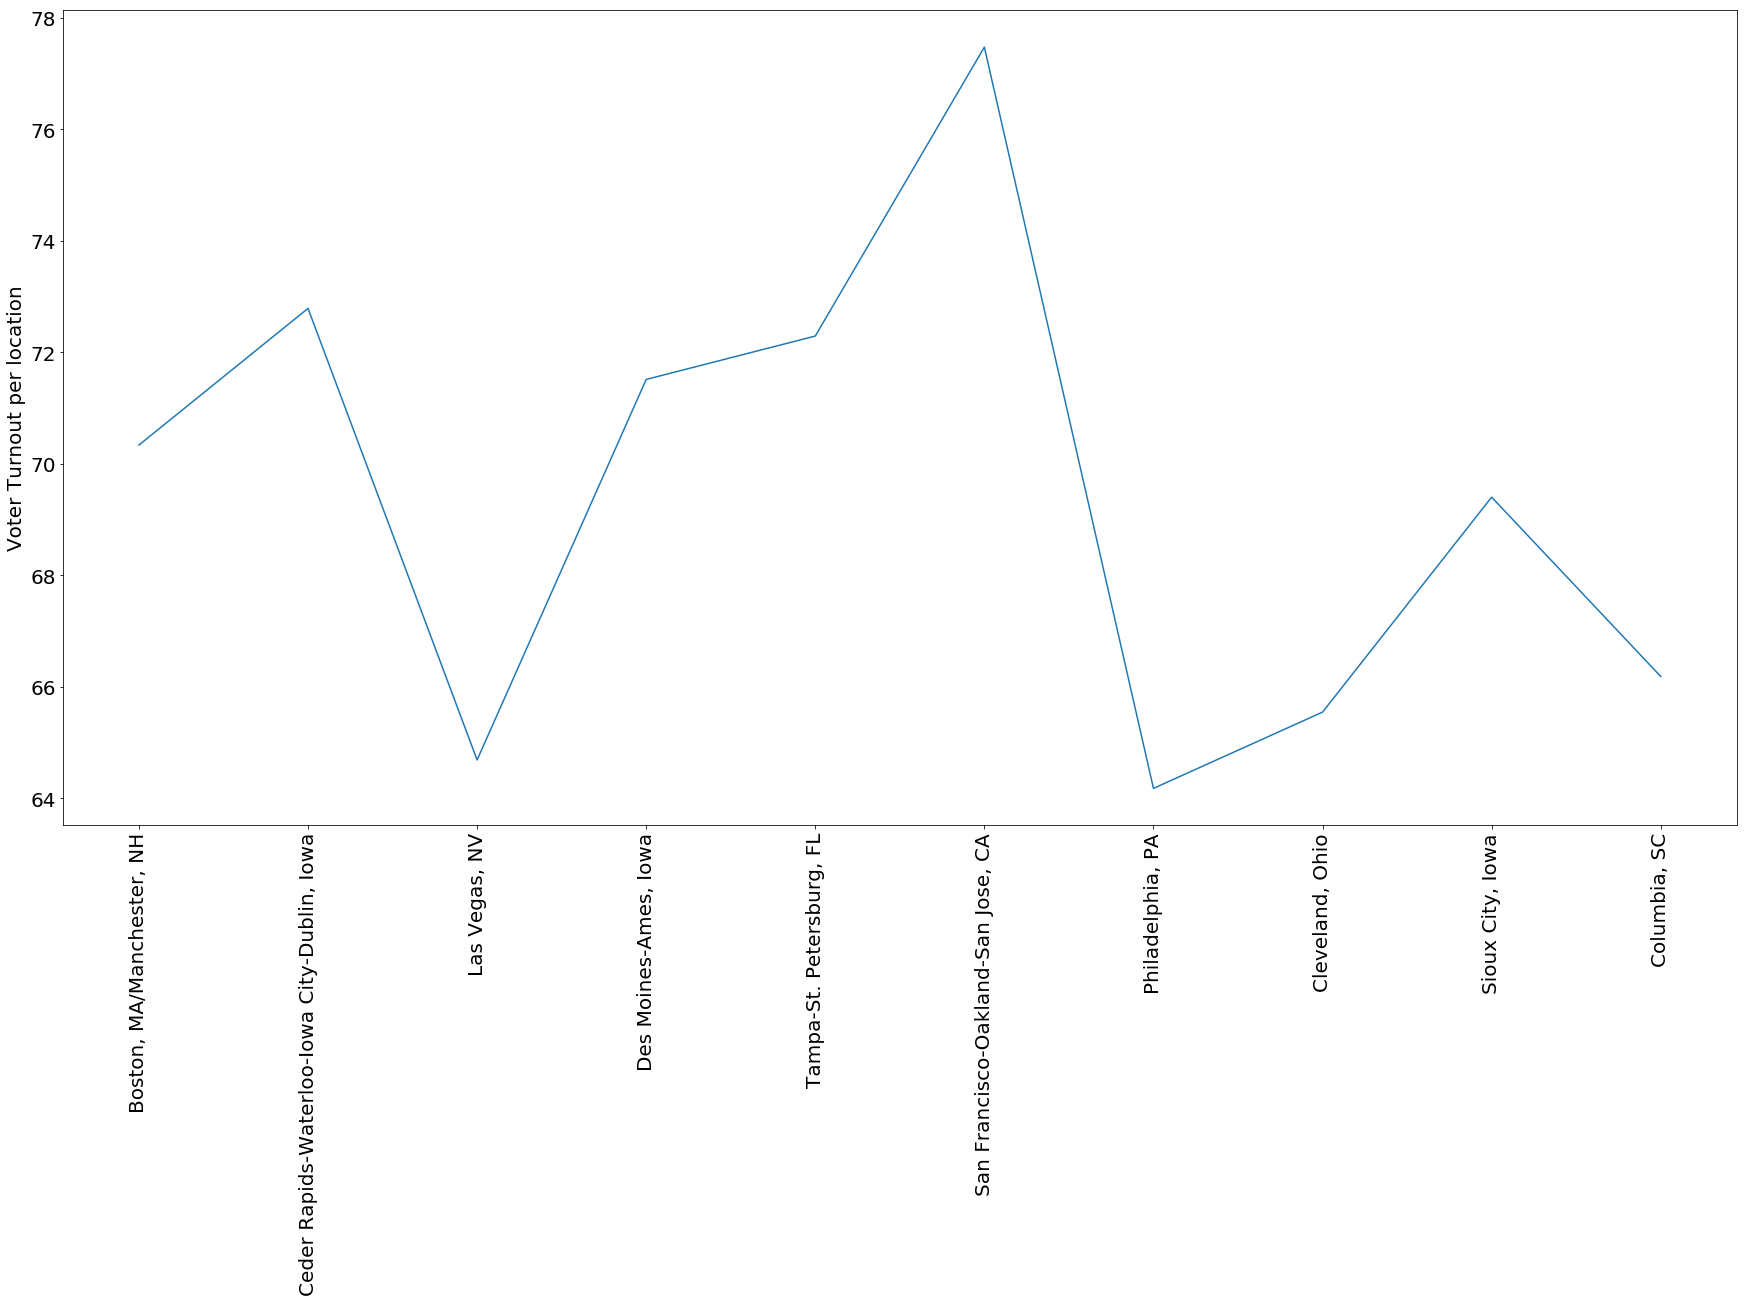

In [154]:
plt.figure(figsize=(30,15))
plt.plot(locations, turnout)
plt.ylabel('Voter Turnout per location', size=20)
plt.xticks(locations, rotation=90)
plt.tick_params(labelsize=20)
plt.title('Voter turnout per location')
plt.show()